<a href="https://colab.research.google.com/github/rohithreddy999/Machine_learning-AI-predictions/blob/main/SUNBASEDATA_customer_churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
df=pd.read_excel("/content/customer_churn_large_dataset.xlsx")

**DROOPING UNNECESSAY COLUMNS***

In [107]:
df.drop(columns=["CustomerID","Name"],axis=1,inplace=True)

In [108]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


**NULL VALUES CHECKING**

In [82]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [83]:
df.isnull().any()

Age                           False
Gender                        False
Location                      False
Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
Churn                         False
dtype: bool

**OUTLIER DETECTION**

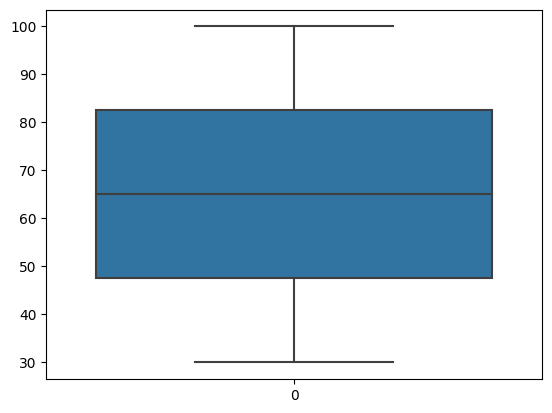

In [84]:
sns.boxplot(df.Monthly_Bill)
plt.show()

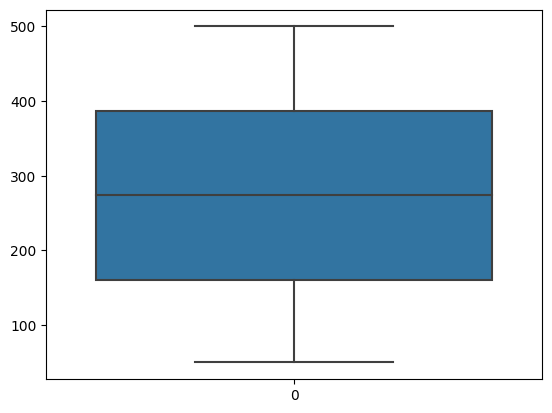

In [85]:
sns.boxplot(df.Total_Usage_GB)
plt.show()

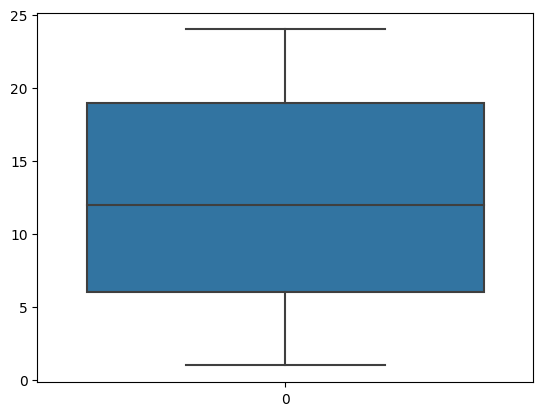

In [86]:
sns.boxplot(df.Subscription_Length_Months)
plt.show()

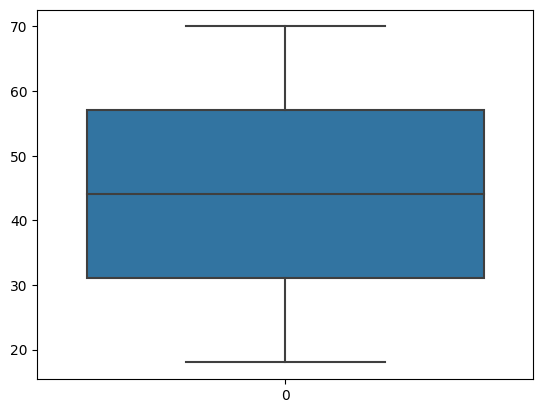

In [109]:
sns.boxplot(df.Age)
plt.show()

**BY THE ABOVE BOXPLOT WE CAN CONCLUDE THAT NO OUTLIERS ARE PRESENT**

**ENCODING CATEGORICAL VARIABLES**

In [110]:
df.sample(4)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
53336,66,Male,Los Angeles,15,52.60,101,0
95520,20,Male,Miami,15,90.70,390,0
26972,19,Male,Houston,11,42.78,231,1
57991,20,Female,Chicago,14,58.43,466,1


In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Location"]=le.fit_transform(df["Location"])

In [112]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


**SPLITTING THE DATA INTO DEPENDENT AND DEPENDENT**

In [113]:
x=df.drop(columns="Churn",axis=1)
x.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,1,2,17,73.36,236
1,62,0,4,1,48.76,172
2,24,0,2,5,85.47,460
3,36,0,3,3,97.94,297
4,46,0,3,19,58.14,266


In [114]:
y=df.Churn
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [94]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=scale.fit_transform(x)

**SPLITTING THE DATA INTO TRAINING AND TESTING**

In [115]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [116]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((80000, 6), (20000, 6), (80000,), (20000,))

**MODEL FITTING USING CLASSIFICATION ALGORITHMS**

**LOGISTIC REGRESSION**

In [117]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,ypred)
acc
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
# Calculate precision
precision = precision_score(ytest, ypred, average='macro')
print("Precision:", precision)
# Calculate recall
recall = recall_score(ytest, ypred, average='macro')
print("Recall:", recall)
# Calculate F1 score
f1 = f1_score(ytest, ypred, average='macro')
print("F1 Score:", f1)
# Calculate confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm)
print("accuracy",acc)

Precision: 0.49958847765222625
Recall: 0.4996209636119967
F1 Score: 0.49016594878743003
Confusion Matrix:
 [[6460 3631]
 [6351 3558]]
accuracy 0.5009


**KNN**

In [118]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
acc_1=accuracy_score(ypred,ytest)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
# Calculate precision
precision_1 = precision_score(ytest, ypred, average='macro')
print("Precision:", precision_1)
# Calculate recall
recall_1 = recall_score(ytest, ypred, average='macro')
print("Recall:", recall_1)
# Calculate F1 score
f1_1 = f1_score(ytest, ypred, average='macro')
print("F1 Score:", f1_1)
# Calculate confusion matrix
cm_1 = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm_1)
print("accuracy",acc_1)

Precision: 0.5032762611832078
Recall: 0.5032756512566805
F1 Score: 0.5032692502074868
Confusion Matrix:
 [[5161 4930]
 [5003 4906]]
accuracy 0.50335


**NAIVE BAYES**

In [119]:
#NAIVE_BAYES
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes model
model = GaussianNB()
# Train the model
model.fit(xtrain, ytrain)
# Make predictions on the test set
ypred = model.predict(xtest)
# Calculate the accuracy of the model
acc_2 = accuracy_score(ytest, ypred)
print("Accuracy:", acc_2)
# Calculate precision
precision_2 = precision_score(ytest, ypred, average='macro')
print("Precision:", precision_2)
# Calculate recall
recall_2 = recall_score(ytest, ypred, average='macro')
print("Recall:", recall_2)
# Calculate F1 score
f1_2 = f1_score(ytest, ypred, average='macro')
print("F1 Score:", f1_2)
# Calculate confusion matrix
cm_2 = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm_2)

Accuracy: 0.5028
Precision: 0.5015852358173188
Recall: 0.5014446746335064
F1 Score: 0.49080215303023667
Confusion Matrix:
 [[6563 3528]
 [6416 3493]]


**DECISION TREE**

In [120]:
#DECISION_TREE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree model
model = DecisionTreeClassifier()
# Train the model
model.fit(xtrain, ytrain)
# Make predictions on the test set
ypred = model.predict(xtest)
#Calculate the accuracy of the model
acc_3 = accuracy_score(ytest, ypred)
print("Accuracy:", acc_3)
# Calculate precision
precision_3 = precision_score(ytest, ypred, average='macro')
print("Precision:", precision_3)
# Calculate recall
recall_3 = recall_score(ytest, ypred, average='macro')
print("Recall:", recall_3)
# Calculate F1 score
f1_3 = f1_score(ytest, ypred, average='macro')
print("F1 Score:", f1_3)
# Calculate confusion matrix
cm_3 = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm_3)

Accuracy: 0.5037
Precision: 0.5035863069961243
Recall: 0.5035842718135488
F1 Score: 0.5035514179038645
Confusion Matrix:
 [[5210 4881]
 [5045 4864]]


**RANDOM FOREST CLASSIFIER**

In [121]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# Create a decision tree model
model = RandomForestClassifier()
# Train the model
model.fit(xtrain, ytrain)
# Make predictions on the test set
ypred = model.predict(xtest)
# Calculate the accuracy of the model
acc_5 = accuracy_score(ytest, ypred)
print("Accuracy:", acc_5)
precision_5 = precision_score(ytest, ypred, average='macro')
print("Precision:", precision_5)
# Calculate recall
recall_5= recall_score(ytest, ypred, average='macro')
print("Recall:", recall_5)
# Calculate F1 score
f1_5 = f1_score(ytest, ypred, average='macro')
print("F1 Score:", f1_5)
# Calculate confusion matrix
cm_5 = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm_5)

Accuracy: 0.4973
Precision: 0.4970530023376933
Recall: 0.4970608816116062
F1 Score: 0.49682266585373547
Confusion Matrix:
 [[5281 4810]
 [5244 4665]]


**ADA BOOST CLASSIFIER**

In [122]:
#ADA BOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(xtrain, ytrain)
#Predict the response for test dataset
ypred = model.predict(xtest)
# Calculate the accuracy of the model
acc_6 = accuracy_score(ytest, ypred)
print("Accuracy:", acc_6)
precision_5 = precision_score(ytest, ypred, average='macro')
print("Precision:", precision_5)
# Calculate recall
recall_5 = recall_score(ytest, ypred, average='macro')
print("Recall:", recall_5)
# Calculate F1 score
f1_5 = f1_score(ytest, ypred, average='macro')
print("F1 Score:", f1_5)
# Calculate confusion matrix
cm_5 = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm_5)

Accuracy: 0.502
Precision: 0.5013270461588049
Recall: 0.5012953122648086
F1 Score: 0.4986287799161562
Confusion Matrix:
 [[5840 4251]
 [5709 4200]]


**DEEP LEARNING --> ANN CLASSIFIER**

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#initializing the object
classification_model=Sequential()


#building an ann model for classification
#input layer
classification_model.add(Dense(6,activation="relu"))
#hidden layers------->
classification_model.add(Dense(64,activation="relu"))
classification_model.add(Dense(36,activation="relu"))
classification_model.add(Dense(16,activation="relu"))
classification_model.add(Dense(10,activation="relu"))
#output layer
classification_model.add(Dense(1,activation="sigmoid"))


classification_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


classification_model.fit(xtrain,ytrain,batch_size=8,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
10000/10000 [==============================] - 40s 4ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 2/10
10000/10000 [==============================] - 52s 5ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 3/10
10000/10000 [==============================] - 37s 4ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 4/10
10000/10000 [==============================] - 38s 4ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 5/10
10000/10000 [==============================] - 31s 3ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 6/10
10000/10000 [==============================] - 31s 3ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 7/10
10000/10000 [==============================] - 31s 3ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0

In [125]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


**TESTING THE ANN MODEL**

In [132]:
y_pred=classification_model.predict(xtest)

625/625 [==============================] - 2s 3ms/step


In [134]:
classification_model.predict([[46,0,3,19,58.14,266]])

1/1 [==============================] - 0s 140ms/step


array([[0.04323034]], dtype=float32)

**VISUALIZATION**

<Axes: xlabel='Churn', ylabel='Count'>

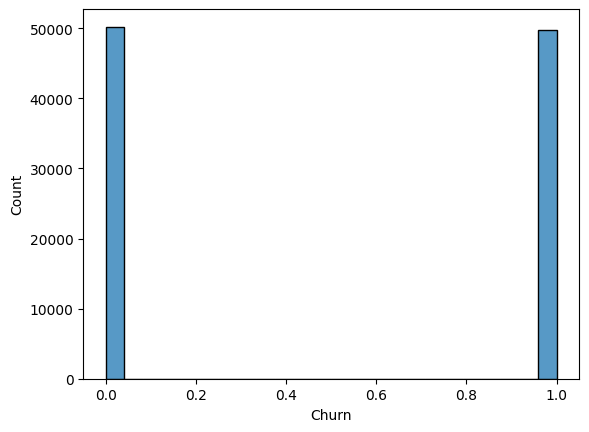

In [130]:
sns.histplot(df.Churn)

<Axes: xlabel='Age', ylabel='Count'>

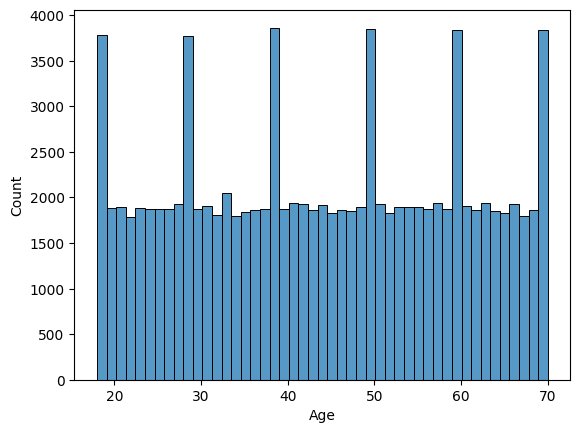

In [131]:
sns.histplot(df.Age)

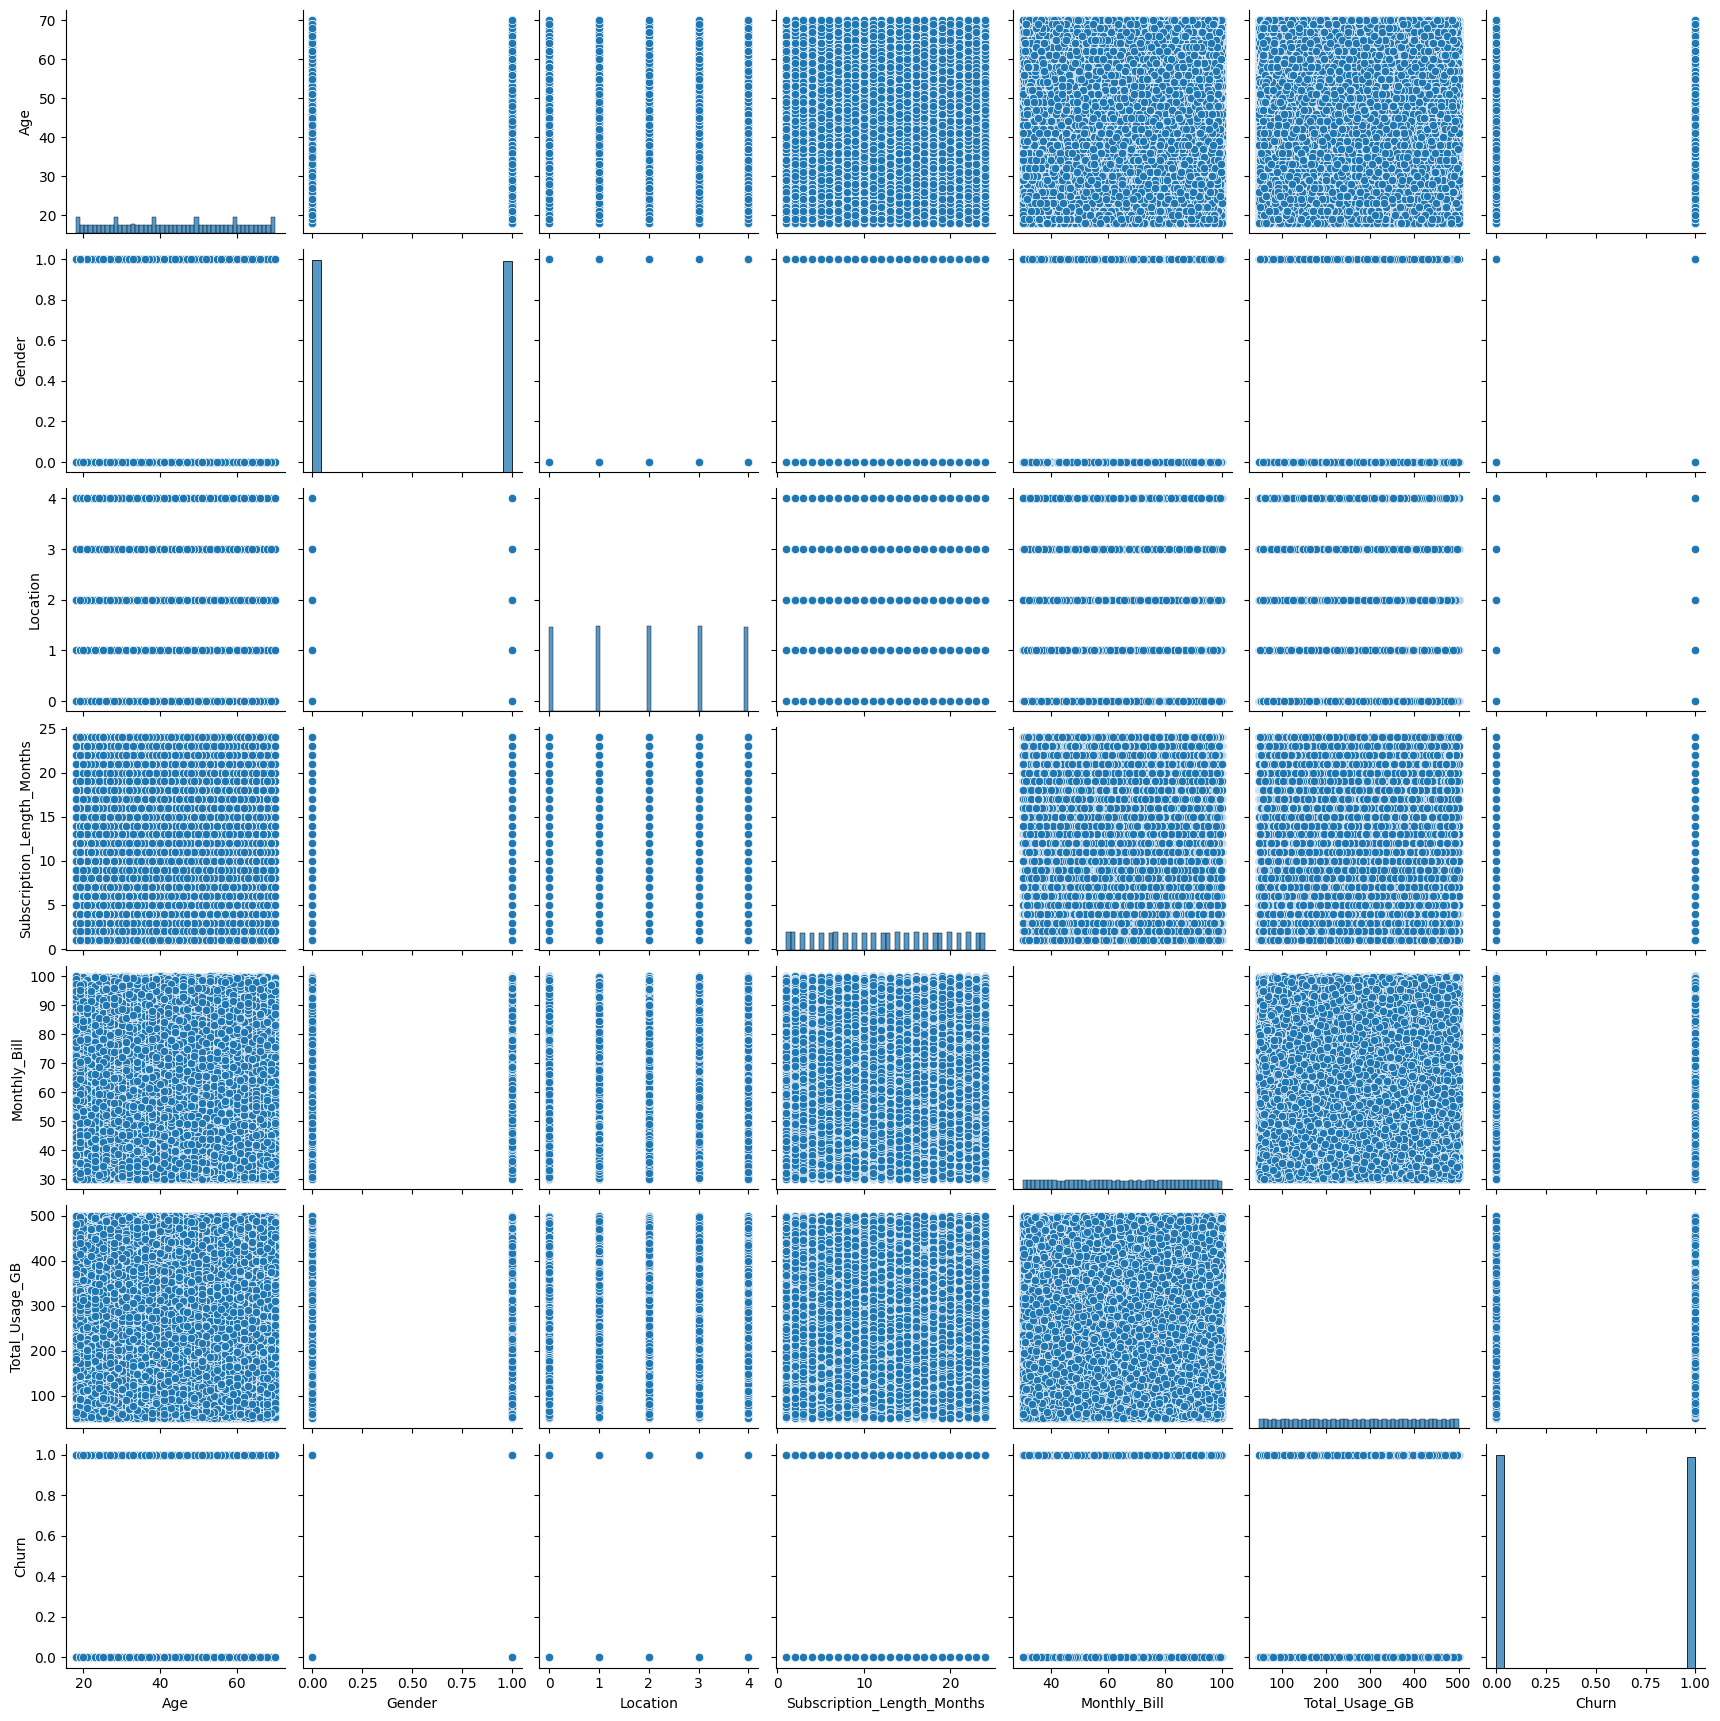

In [135]:
sns.pairplot(df)